In [1]:
import pandas as pd
from utils.formate_matrix_toMLData import *
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_dir = "/media/user/TRANSCEND/datas/test_data"

test_states = []
test_del_t = []
test_targets = []
dataset = []
data_formater = formate_dataMatrix()

# 読み込む対象の拡張子（例: .csv のみに限定）
VALID_EXTENSIONS = (".csv", ".txt")
IGNORED_PREFIXES = ( "._",".DS_Store", "Thumbs.db")

def process_file(file_path):
    #ファイルの読み込み
    try:
        print("Processing:", file_path)
        with open(file_path, 'rb') as f:
            all_matrix = np.loadtxt(f, delimiter=",")
   
        tm = matrix_trimer(all_matrix)
        trm = tm.trim_transitionRateMatrix()
        data = tm.trim_data()
        dataset.append(data)
        output_vec = np.array(data_formater.GetOutputVector_byDiagonal(trm))
        
        state = np.stack([data[:,0], data[:,1]], axis=0)
        test_states.append(state)
        
        test_del_t.append(data[:, 2])
        
        test_targets.append(output_vec)
        print(file_path)
    except Exception as e:
        print(f"❌ Skipping file: {file_path} (Reason: {e})")


# ディレクトリ内のファイルを一括処理
def process_all_files_in_directory(directory, func,start = 0, end = None):
    all_files = sorted(os.listdir(directory))
    selected_files = all_files[start:end]
    
    for filename in selected_files:
        print(f"Processing file: {filename}")
        if filename.startswith(IGNORED_PREFIXES):
            continue
        if not filename.endswith(VALID_EXTENSIONS):
            continue

        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            func(file_path)

# 実行
process_all_files_in_directory(data_dir, process_file)


Processing file: 280_20000_4.csv
Processing: /Volumes/TRANSCEND/datas/test_data/280_20000_4.csv
/Volumes/TRANSCEND/datas/test_data/280_20000_4.csv
Processing file: 281_20000_4.csv
Processing: /Volumes/TRANSCEND/datas/test_data/281_20000_4.csv
/Volumes/TRANSCEND/datas/test_data/281_20000_4.csv
Processing file: 282_20000_4.csv
Processing: /Volumes/TRANSCEND/datas/test_data/282_20000_4.csv
/Volumes/TRANSCEND/datas/test_data/282_20000_4.csv
Processing file: 283_20000_4.csv
Processing: /Volumes/TRANSCEND/datas/test_data/283_20000_4.csv
/Volumes/TRANSCEND/datas/test_data/283_20000_4.csv
Processing file: 284_20000_4.csv
Processing: /Volumes/TRANSCEND/datas/test_data/284_20000_4.csv
/Volumes/TRANSCEND/datas/test_data/284_20000_4.csv
Processing file: 285_20000_4.csv
Processing: /Volumes/TRANSCEND/datas/test_data/285_20000_4.csv
/Volumes/TRANSCEND/datas/test_data/285_20000_4.csv
Processing file: 286_20000_4.csv
Processing: /Volumes/TRANSCEND/datas/test_data/286_20000_4.csv
/Volumes/TRANSCEND/dat

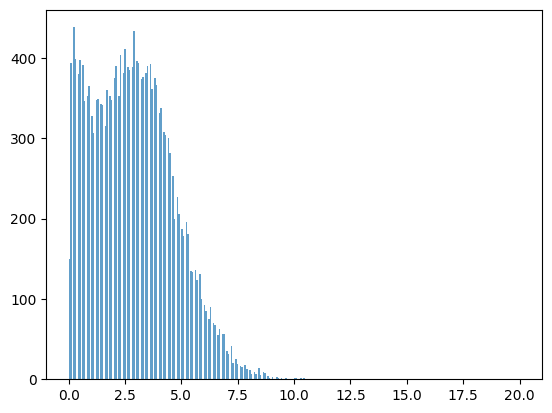

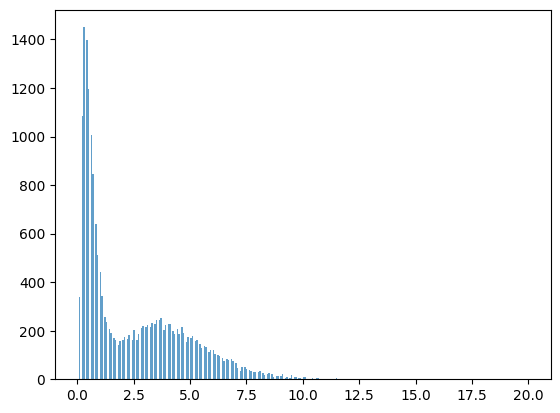

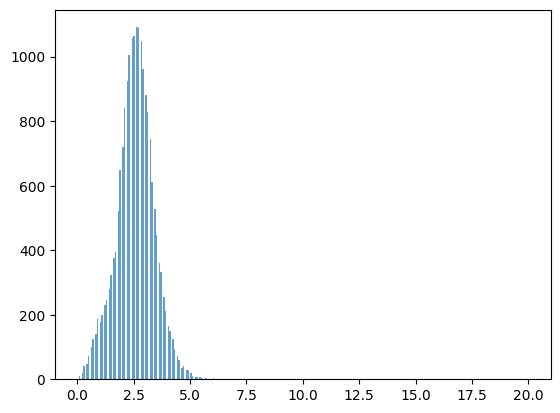

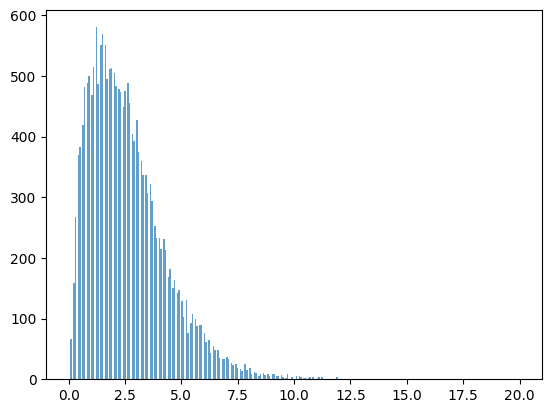

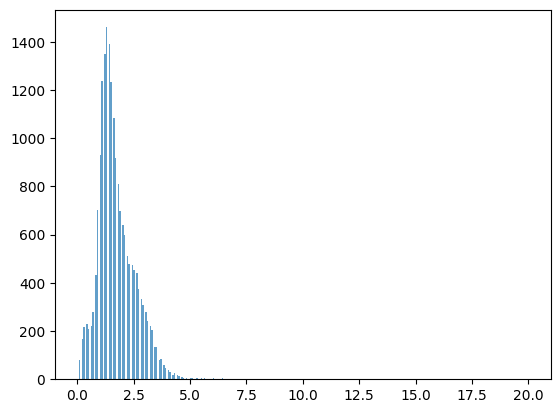

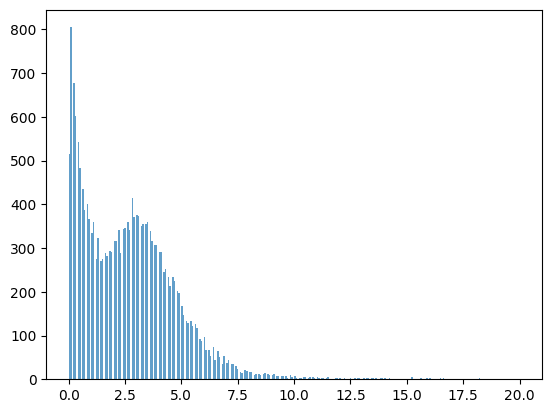

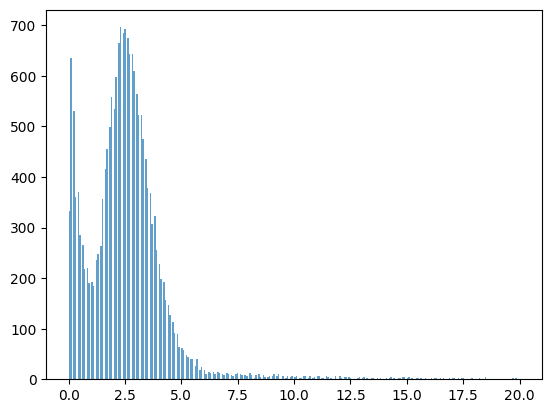

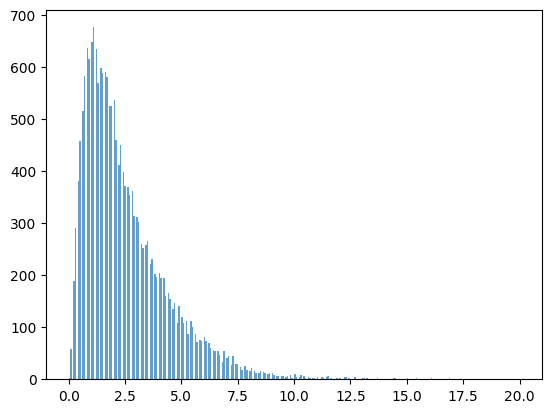

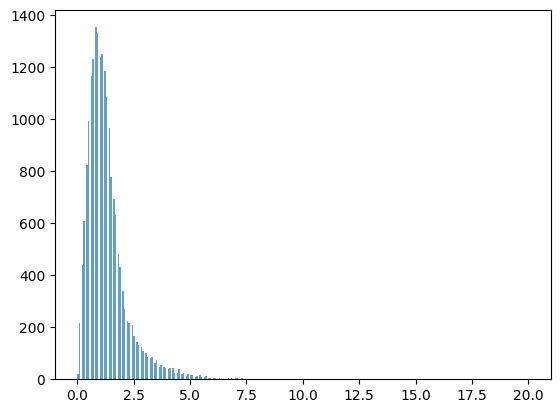

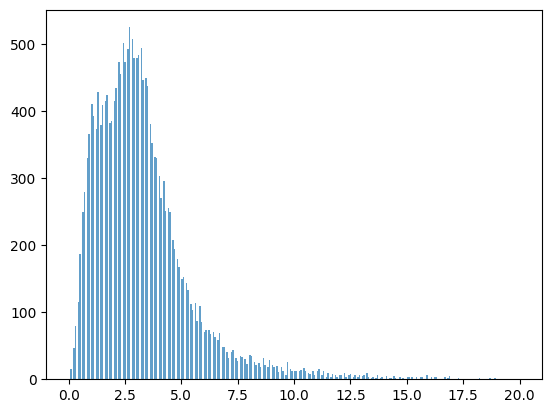

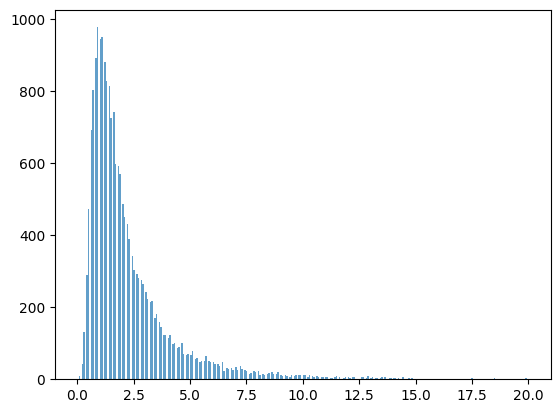

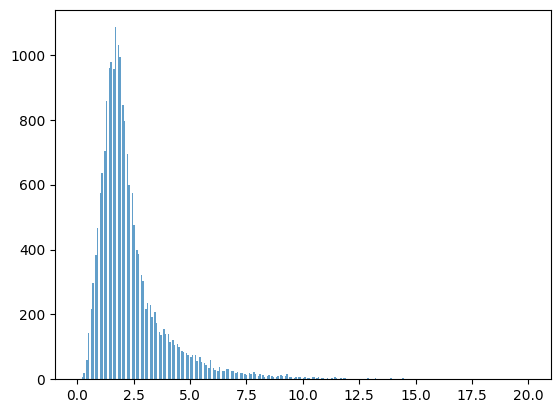

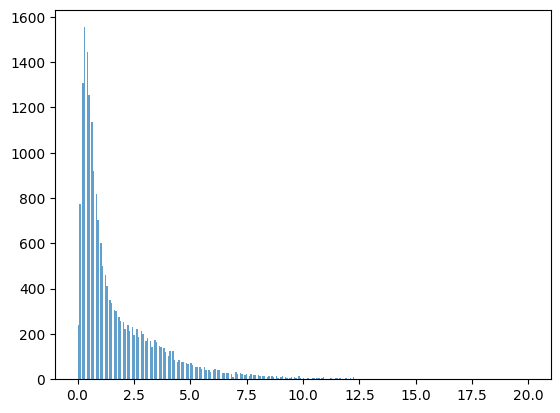

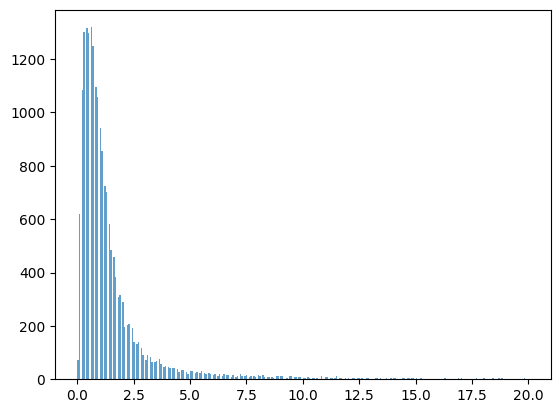

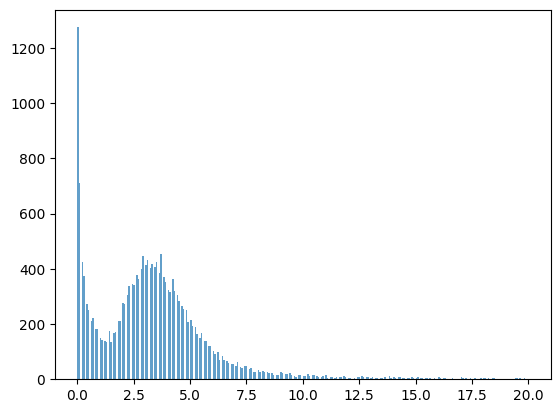

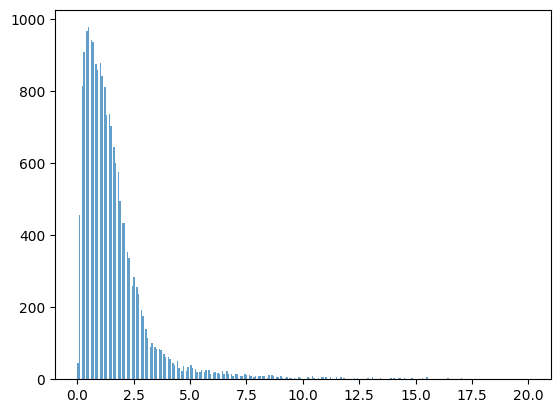

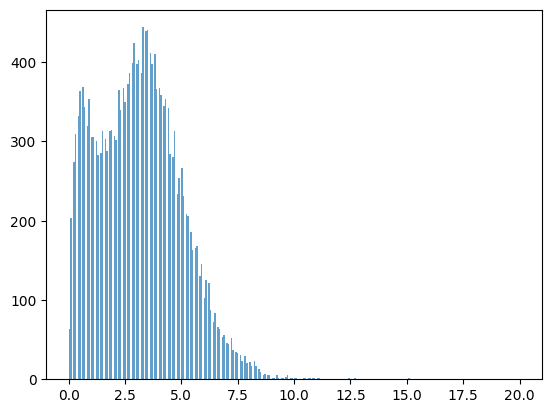

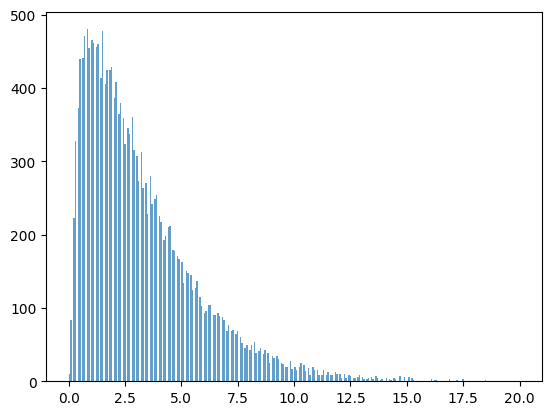

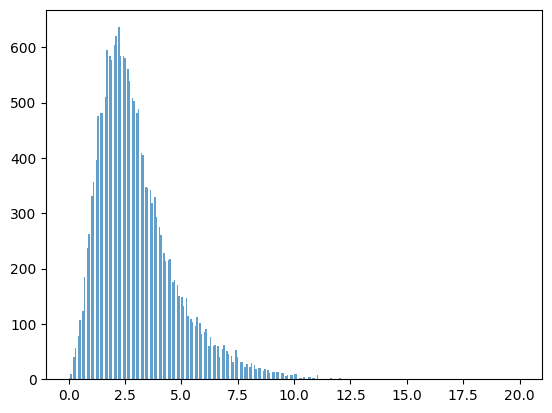

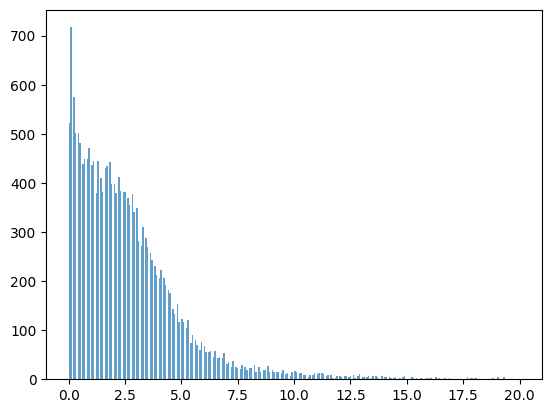

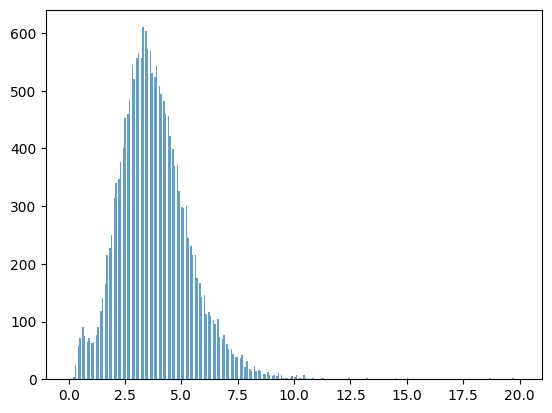

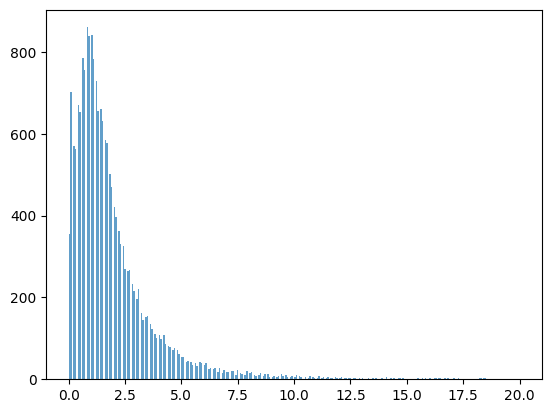

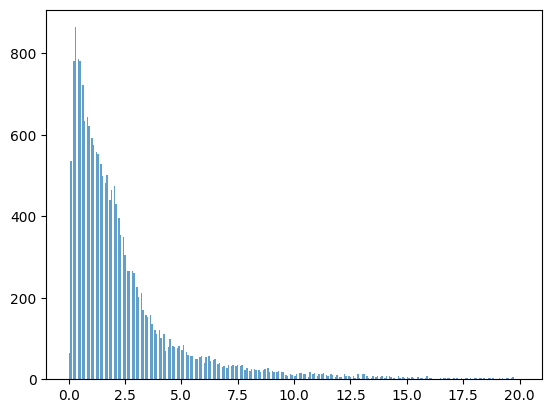

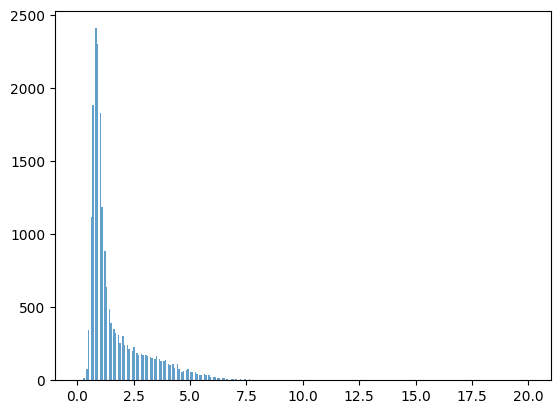

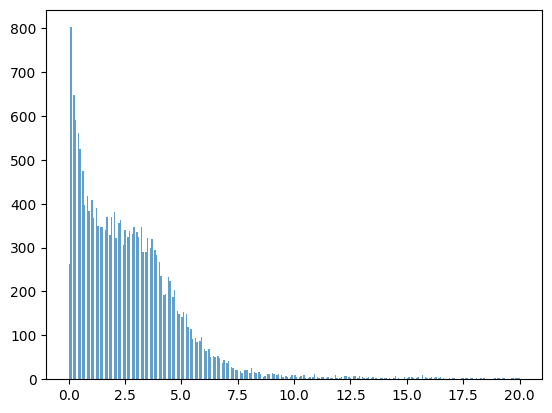

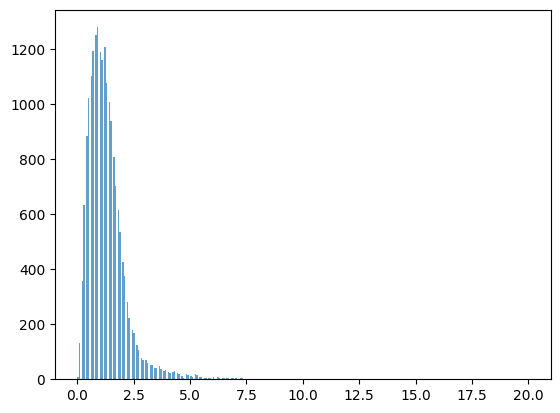

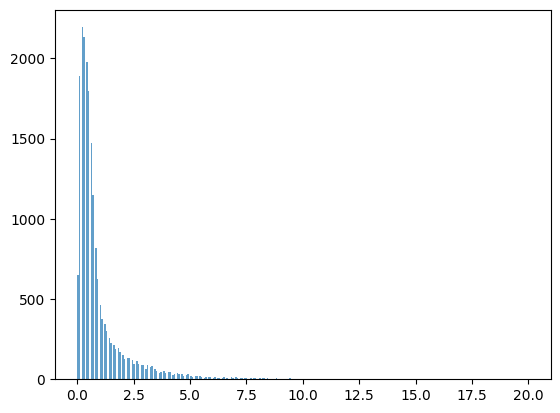

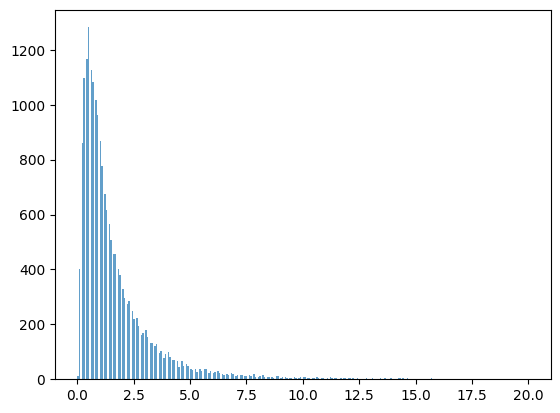

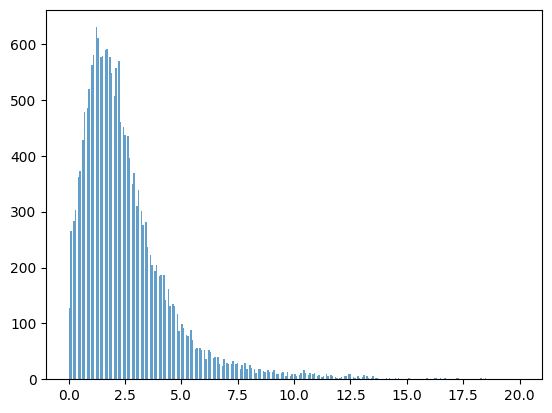

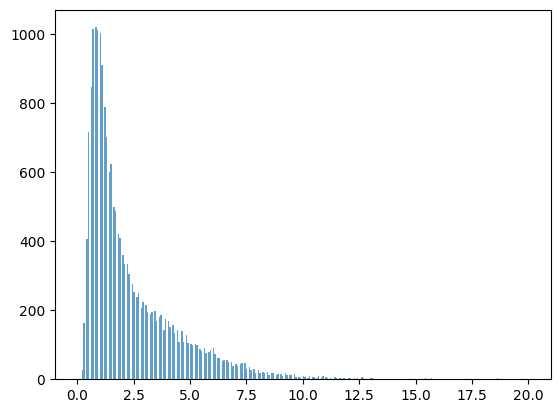

In [ ]:
# for i in range(len(test_del_t)):
#     plt.hist(test_del_t[i], bins=300, alpha=0.7, range=[0,20],label='Time Intervals')
#     plt.show()